In [1]:
pip install jax jaxlib neural-tangents matplotlib

INFO: pip is looking at multiple versions of tf2jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 8.4 MB/s eta 0:00:00


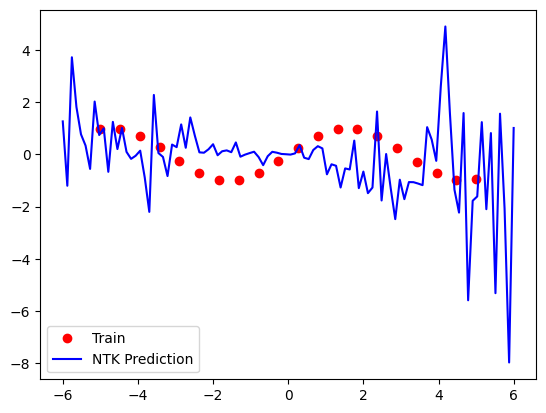

In [2]:
import jax
import jax.numpy as jnp
from neural_tangents import stax

#Create perceptron with Relu
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(1024), stax.Relu(),
    stax.Dense(1024), stax.Relu(),
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 1e-3
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()

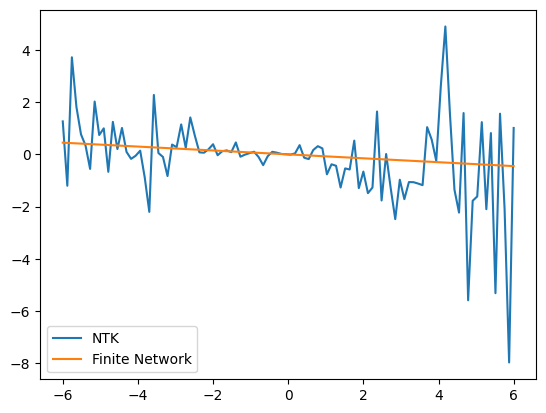

In [3]:
from jax import grad

#Set random RTK for a pytree
key = jax.random.PRNGKey(0)
params = init_fn(key, (-1, 1))[1]

#MSE formula
def loss_fn(params, x, y):
    preds = apply_fn(params, x)
    return jnp.mean((preds - y) ** 2)

#pytree of gradients
grad_fn = grad(loss_fn)

#approximate with gd
for step in range(5000):
    grads = grad_fn(params, x_train, y_train)
    params = jax.tree_util.tree_map(lambda p, g: p - 0.01 * g, params, grads)

y_pred_finite = apply_fn(params, x_test)

#Display
plt.plot(x_test, y_pred, label='NTK')
plt.plot(x_test, y_pred_finite, label='Finite Network')
plt.legend()
plt.show()

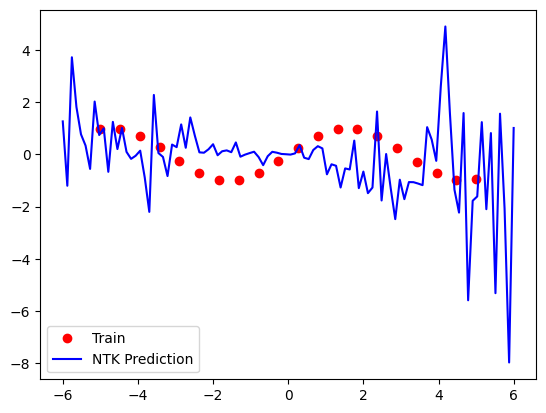

In [11]:
#Create perceptron with Relu
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(1024), stax.Relu(),
    stax.Dense(1024), stax.Relu(),
    stax.Dense(32)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 1e-3
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()

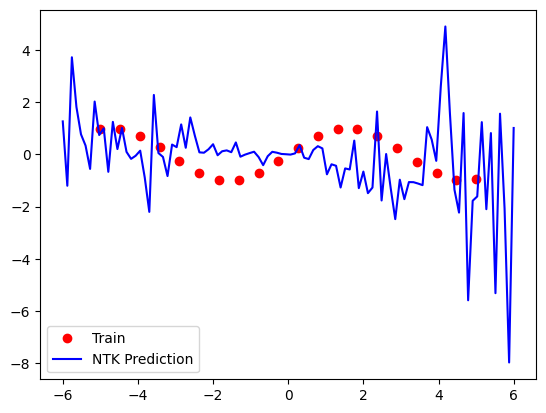

In [9]:
#Create perceptron with Relu
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(128), stax.Relu(),
    stax.Dense(128), stax.Relu(),
    stax.Dense(1)
)

#Model after sin function,
#20 points between -5 and 5 (reshape into column vector)
x_train = jnp.linspace(-5, 5, 20).reshape(-1, 1)
y_train = jnp.sin(x_train)

x_test = jnp.linspace(-6, 6, 100).reshape(-1, 1)

#Create train data with NTK
kernel_train_train = kernel_fn(x_train, x_train, 'ntk')
kernel_test_train = kernel_fn(x_test, x_train, 'ntk')

#Predict with train data
lambda_reg = 1e-3
K_inv = jnp.linalg.inv(kernel_train_train + lambda_reg * jnp.eye(len(x_train)))
y_pred = kernel_test_train @ K_inv @ y_train

#Visualize contrast
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train, y_train, 'ro', label='Train')
plt.plot(x_test, y_pred, 'b-', label='NTK Prediction')
plt.legend()
plt.show()